In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

In [3]:
x,y = make_regression(n_samples=100,n_features=1,n_targets=1,noise=20,n_informative=1,random_state=13)

In [5]:
print("x =",x.shape)
print("y =",y.shape)

x = (100, 1)
y = (100,)


In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

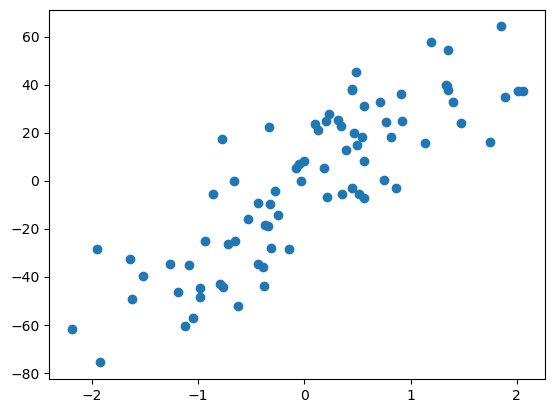

In [8]:
plt.scatter(x_train,y_train)

In [10]:
li = LinearRegression()
li.fit(x_train,y_train)
print("m =",li.coef_)
print("b =",li.intercept_)

m = [28.12597332]
b = -2.2710144261783816


In [11]:
y_pred = li.predict(x_test)
r2_score(y_test,y_pred)

0.6345158782661013

In [16]:
class My_GDRegression:

    def __init__(self,lr,epoch):
        self.m = 100
        self.b = -120
        self.lr = lr
        self.epoch = epoch

    def fit(self,x,y):
        for i in range(self.epoch):
            b_slope = -2 * np.sum(y-self.m*x.ravel()-self.b)
            m_slope = -2 * np.sum((y-self.m*x.ravel()-self.b)*x.ravel())
            
            b_stepsize = self.lr*b_slope
            m_stepsize = self.lr*m_slope

            self.b -= b_stepsize
            self.m -= m_stepsize
        
        print(self.m,self.b)

    def predict(self,x_test):
        return self.m*x_test+self.b

In [17]:
gd = My_GDRegression(0.01,100)
gd.fit(x_train,y_train)
y_pred = gd.predict(x_test)

28.12597331513561 -2.271014426178381


In [18]:
r2_score(y_test,y_pred)

0.6345158782661013